# Convolutional Neural Network

This notebook contains tests of the CNN architecture. Results will later be copied to the main Jupyter Notebook in the root folder of the Project 1.

In [52]:
from tensorflow import keras
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

data_path = os.path.abspath('../data/cinic-10_image_classification_challenge-dataset/train')

seed_value = 2024

train_ds, test_ds = keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="both",
    seed=seed_value,
    image_size=(32, 32),
    batch_size=16,
    shuffle=False # False to visualize augmentation
)

class_names = train_ds.class_names
print(f'Classes: {class_names}')
input_shape = (32, 32, 3)
n_classes = len(class_names)

def plot_accuracy_and_loss(history_df, name, idx):
    # Plot and save accuraccy
    plt.plot(history_df['accuracy'])
    plt.plot(history_df['val_accuracy'])
    plt.title(f'{name}: accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    path = f'train_history/{name}/{idx}_accuracy.png'
    plt.savefig(path)
    print(f'Accuracy plot is saved to: {path}')
    plt.close()
    # Plot and save loss
    plt.figure()
    plt.plot(history_df['loss'])
    plt.plot(history_df['val_loss'])
    plt.title(f'{name}: loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    path = f'train_history/{name}/{idx}_loss.png'
    plt.savefig(path)
    print(f'Loss plot is saved to: {path}')
    plt.close()

def plot_confusion_matrix(name, idx):
    model = keras.models.load_model('train_history/'+name+'/'+idx+'.keras')
    images, labels = tuple(zip(*test_ds.unbatch()))
    X_test = np.array(images)
    y_test = np.array(labels)
    y_pred = np.argmax(model.predict(X_test), axis=-1)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(0, 10), yticklabels=range(0, 10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name} Confusion Matrix. Accuracy: {accuracy * 100:.2f}%')
    path = f'train_history/{name}/{idx}_confusion_matrix.png'
    plt.savefig(path)
    print(f'Confusion matrix is saved to: {path}')
    plt.close()
    return accuracy

def plot_accuracy_boxplot(accuracy, name): 
    plt.figure()
    plt.boxplot(accuracy)
    plt.xticks([1], [name])
    plt.title(f'{name}: Accuracy boxplot')
    path = f'train_history/{name}/boxplot.png'
    plt.savefig(path)
    print(f'Accuracy boxplot is saved to: {path}')
    plt.close()

Found 90000 files belonging to 10 classes.
Using 72000 files for training.
Using 18000 files for validation.
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Test 1: Single convolutional layer
Conv2D - MaxPooling2D - (Flatten) Dense (1024) - Dense (10)

In [32]:
name = 'cnn1'
n_epochs = 10
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'
n_repeat = 5

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
  x = keras.layers.MaxPooling2D((2, 2))(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Epoch 1/10
4500/4500 [==============================] - 73s 16ms/step - loss: 6.9584 - accuracy: 0.3302 - val_loss: 1.6841 - val_accuracy: 0.4035
Epoch 2/10
4500/4500 [==============================] - 73s 16ms/step - loss: 1.4700 - accuracy: 0.4743 - val_loss: 1.5687 - val_accuracy: 0.4588
Epoch 3/10
4500/4500 [==============================] - 72s 16ms/step - loss: 1.0609 - accuracy: 0.6315 - val_loss: 1.7221 - val_accuracy: 0.4654
Epoch 4/10
4500/4500 [==============================] - 70s 16ms/step - loss: 0.6399 - accuracy: 0.7858 - val_loss: 2.1110 - val_accuracy: 0.4599
Epoch 5/10
4500/4500 [==============================] - 70s 16ms/step - loss: 0.3356 - accuracy: 0.8956 - val_loss: 2.5846 - val_accuracy: 0.4593
Epoch 6/10
4500/4500 [==============================] - 69s 15ms/step - loss: 0.1860 - accuracy: 0.9459 - val_loss: 2.9754 - val_accuracy: 0.4588
Epoch 7/10
4500/4500 [==============================] - 70s 16ms/step - loss: 0.1157 - accuracy: 0.9682 - val_los

## Test 2: Single convolutional layer with normalization

Conv2D - (Batch normalization) MaxPooling2D - (Flatten) Dense (1024) - Dense (10)

In [34]:
name = 'cnn2'
n_epochs = 10
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'
n_repeat = 5

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Epoch 1/10
4500/4500 [==============================] - 77s 17ms/step - loss: 1.6017 - accuracy: 0.4372 - val_loss: 1.4802 - val_accuracy: 0.4733
Epoch 2/10
4500/4500 [==============================] - 77s 17ms/step - loss: 1.2207 - accuracy: 0.5621 - val_loss: 1.3539 - val_accuracy: 0.5294
Epoch 3/10
4500/4500 [==============================] - 77s 17ms/step - loss: 0.9617 - accuracy: 0.6606 - val_loss: 1.4808 - val_accuracy: 0.5253
Epoch 4/10
4500/4500 [==============================] - 77s 17ms/step - loss: 0.6861 - accuracy: 0.7667 - val_loss: 1.6499 - val_accuracy: 0.5269
Epoch 5/10
4500/4500 [==============================] - 78s 17ms/step - loss: 0.4391 - accuracy: 0.8571 - val_loss: 2.0576 - val_accuracy: 0.4988
Epoch 6/10
4500/4500 [==============================] - 77s 17ms/step - loss: 0.2601 - accuracy: 0.9192 - val_loss: 2.1850 - val_accuracy: 0.5096
Epoch 7/10
4500/4500 [==============================] - 78s 17ms/step - loss: 0.1538 - accuracy: 0.9550 - val_los

## Test 3: Dropout layer

Conv2D - (Batch normalization) MaxPooling2D - (Flatten) Dropout - Dense (1024) - Dropout - Dense (10)

In [35]:
name = 'cnn3'
n_epochs = 10
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'
n_repeat = 5

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Epoch 1/10
4500/4500 [==============================] - 78s 17ms/step - loss: 1.6980 - accuracy: 0.4041 - val_loss: 1.5727 - val_accuracy: 0.4527
Epoch 2/10
4500/4500 [==============================] - 78s 17ms/step - loss: 1.3610 - accuracy: 0.5068 - val_loss: 1.3844 - val_accuracy: 0.5098
Epoch 3/10
4500/4500 [==============================] - 78s 17ms/step - loss: 1.1993 - accuracy: 0.5704 - val_loss: 1.4137 - val_accuracy: 0.5074
Epoch 4/10
4500/4500 [==============================] - 78s 17ms/step - loss: 1.0499 - accuracy: 0.6264 - val_loss: 1.4221 - val_accuracy: 0.5316
Epoch 5/10
4500/4500 [==============================] - 78s 17ms/step - loss: 0.9061 - accuracy: 0.6795 - val_loss: 1.4359 - val_accuracy: 0.5421
Epoch 6/10
4500/4500 [==============================] - 78s 17ms/step - loss: 0.7634 - accuracy: 0.7314 - val_loss: 1.5106 - val_accuracy: 0.5420
Epoch 7/10
4500/4500 [==============================] - 78s 17ms/step - loss: 0.6420 - accuracy: 0.7774 - val_los

## Test 4: Multiple convolutional layers

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

(Flatten) Dropout - Dense (1024) - Dropout - Dense (10)

In [3]:
name = 'cnn4'
n_epochs = 10
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'
n_repeat = 5

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Epoch 1/10
4500/4500 [==============================] - 112s 25ms/step - loss: 1.5707 - accuracy: 0.4392 - val_loss: 1.2650 - val_accuracy: 0.5459
Epoch 2/10
4500/4500 [==============================] - 86s 19ms/step - loss: 1.2096 - accuracy: 0.5639 - val_loss: 1.1469 - val_accuracy: 0.5898
Epoch 3/10
4500/4500 [==============================] - 87s 19ms/step - loss: 1.0378 - accuracy: 0.6266 - val_loss: 1.1283 - val_accuracy: 0.6103
Epoch 4/10
4500/4500 [==============================] - 87s 19ms/step - loss: 0.8885 - accuracy: 0.6801 - val_loss: 1.0876 - val_accuracy: 0.6339
Epoch 5/10
4500/4500 [==============================] - 86s 19ms/step - loss: 0.7408 - accuracy: 0.7358 - val_loss: 1.1802 - val_accuracy: 0.6255
Epoch 6/10
4500/4500 [==============================] - 88s 19ms/step - loss: 0.6006 - accuracy: 0.7863 - val_loss: 1.2076 - val_accuracy: 0.6260
Epoch 7/10
4500/4500 [==============================] - 87s 19ms/step - loss: 0.4762 - accuracy: 0.8314 - val_lo

## Test 5: (2, 2) filter

Same architecture as test 4, but filter is (2, 2) instead of (3, 3)

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

(Flatten) Dropout - Dense (1024) - Dropout - Dense (10)

In [4]:
name = 'cnn5'
n_epochs = 10
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'
n_repeat = 5
filter = (2, 2)

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Epoch 1/10
4500/4500 [==============================] - 73s 16ms/step - loss: 1.5467 - accuracy: 0.4449 - val_loss: 1.3139 - val_accuracy: 0.5302
Epoch 2/10
4500/4500 [==============================] - 74s 16ms/step - loss: 1.2264 - accuracy: 0.5554 - val_loss: 1.1457 - val_accuracy: 0.5884
Epoch 3/10
4500/4500 [==============================] - 75s 17ms/step - loss: 1.0732 - accuracy: 0.6129 - val_loss: 1.0881 - val_accuracy: 0.6148
Epoch 4/10
4500/4500 [==============================] - 76s 17ms/step - loss: 0.9336 - accuracy: 0.6620 - val_loss: 1.0875 - val_accuracy: 0.6212
Epoch 5/10
4500/4500 [==============================] - 76s 17ms/step - loss: 0.7913 - accuracy: 0.7172 - val_loss: 1.0841 - val_accuracy: 0.6316
Epoch 6/10
4500/4500 [==============================] - 77s 17ms/step - loss: 0.6537 - accuracy: 0.7665 - val_loss: 1.1343 - val_accuracy: 0.6327
Epoch 7/10
4500/4500 [==============================] - 77s 17ms/step - loss: 0.5257 - accuracy: 0.8147 - val_los

## Test 6. 6 convolutional layers
Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

(Flatten) Dropout - Dense (1024) - Dropout - Dense (10)

In [3]:
name = 'cnn6'
n_epochs = 10
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'
n_repeat = 5
filter = (3, 3)

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Epoch 1/10
4500/4500 [==============================] - 118s 26ms/step - loss: 1.5801 - accuracy: 0.4330 - val_loss: 1.2883 - val_accuracy: 0.5324
Epoch 2/10
4500/4500 [==============================] - 94s 21ms/step - loss: 1.2044 - accuracy: 0.5652 - val_loss: 1.1055 - val_accuracy: 0.6012
Epoch 3/10
4500/4500 [==============================] - 98s 22ms/step - loss: 1.0420 - accuracy: 0.6229 - val_loss: 1.0035 - val_accuracy: 0.6410
Epoch 4/10
4500/4500 [==============================] - 105s 23ms/step - loss: 0.9198 - accuracy: 0.6697 - val_loss: 0.9806 - val_accuracy: 0.6507
Epoch 5/10
4500/4500 [==============================] - 121s 27ms/step - loss: 0.8132 - accuracy: 0.7049 - val_loss: 0.9851 - val_accuracy: 0.6553
Epoch 6/10
4500/4500 [==============================] - 100s 22ms/step - loss: 0.7140 - accuracy: 0.7409 - val_loss: 0.9725 - val_accuracy: 0.6678
Epoch 7/10
4500/4500 [==============================] - 98s 22ms/step - loss: 0.6225 - accuracy: 0.7763 - val

## Test 7. Optimizer Nadam

Same architecture

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

(Flatten) Dropout - Dense (1024) - Dropout - Dense (10)


In [3]:
name = 'cnn7'
n_epochs = 10
optimizer = keras.optimizers.Nadam(learning_rate=0.001)
loss = 'sparse_categorical_crossentropy'
n_repeat = 5
filter = (3, 3)

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Epoch 1/10
4500/4500 [==============================] - 130s 28ms/step - loss: 1.5782 - accuracy: 0.4302 - val_loss: 1.5742 - val_accuracy: 0.4326
Epoch 2/10
4500/4500 [==============================] - 107s 24ms/step - loss: 1.2644 - accuracy: 0.5462 - val_loss: 1.1450 - val_accuracy: 0.5876
Epoch 3/10
4500/4500 [==============================] - 109s 24ms/step - loss: 1.1148 - accuracy: 0.6022 - val_loss: 1.0764 - val_accuracy: 0.6240
Epoch 4/10
4500/4500 [==============================] - 110s 24ms/step - loss: 1.0018 - accuracy: 0.6421 - val_loss: 1.0626 - val_accuracy: 0.6286
Epoch 5/10
4500/4500 [==============================] - 111s 25ms/step - loss: 0.9047 - accuracy: 0.6757 - val_loss: 0.9588 - val_accuracy: 0.6619
Epoch 6/10
4500/4500 [==============================] - 110s 24ms/step - loss: 0.8231 - accuracy: 0.7049 - val_loss: 0.9478 - val_accuracy: 0.6727
Epoch 7/10
4500/4500 [==============================] - 111s 25ms/step - loss: 0.7419 - accuracy: 0.7342 - 

## Test 8. Optimizer Adam
Same architecture

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

(Flatten) Dropout - Dense (1024) - Dropout - Dense (10)

In [7]:
name = 'cnn8'
n_epochs = 10
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = 'sparse_categorical_crossentropy'
n_repeat = 5
filter = (3, 3)

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Epoch 1/10
4500/4500 [==============================] - 97s 21ms/step - loss: 1.6006 - accuracy: 0.4263 - val_loss: 1.3045 - val_accuracy: 0.5286
Epoch 2/10
4500/4500 [==============================] - 96s 21ms/step - loss: 1.2667 - accuracy: 0.5458 - val_loss: 1.1906 - val_accuracy: 0.5784
Epoch 3/10
4500/4500 [==============================] - 98s 22ms/step - loss: 1.1159 - accuracy: 0.6001 - val_loss: 1.1687 - val_accuracy: 0.5959
Epoch 4/10
4500/4500 [==============================] - 99s 22ms/step - loss: 1.0001 - accuracy: 0.6398 - val_loss: 1.0046 - val_accuracy: 0.6469
Epoch 5/10
4500/4500 [==============================] - 100s 22ms/step - loss: 0.9028 - accuracy: 0.6752 - val_loss: 0.9748 - val_accuracy: 0.6621
Epoch 6/10
4500/4500 [==============================] - 100s 22ms/step - loss: 0.8164 - accuracy: 0.7058 - val_loss: 0.9646 - val_accuracy: 0.6670
Epoch 7/10
4500/4500 [==============================] - 100s 22ms/step - loss: 0.7323 - accuracy: 0.7347 - val_

## Test 9. Optimizer adamax; learning rate tuning

Same architecture. Learning rates: 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

(Flatten) Dropout - Dense (1024) - Dropout - Dense (10)

In [11]:
name = 'cnn9'
n_epochs = 10
loss = 'sparse_categorical_crossentropy'
n_repeat = 5
filter = (3, 3)

l_rates = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

keras.utils.set_random_seed(seed_value)

accuracy = []
for idx, learning_rate in enumerate(l_rates):
  print(f'Attempt #{idx + 1}')
  print(f'Learning rate: {learning_rate}')

  optimizer = keras.optimizers.Adamax(learning_rate=learning_rate)
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Attempt #1
Learning rate: 0.0005
Epoch 1/10
4500/4500 [==============================] - 96s 21ms/step - loss: 1.6328 - accuracy: 0.4146 - val_loss: 1.2856 - val_accuracy: 0.5304
Epoch 2/10
4500/4500 [==============================] - 97s 22ms/step - loss: 1.2633 - accuracy: 0.5387 - val_loss: 1.1285 - val_accuracy: 0.5940
Epoch 3/10
4500/4500 [==============================] - 100s 22ms/step - loss: 1.0970 - accuracy: 0.6035 - val_loss: 1.0582 - val_accuracy: 0.6219
Epoch 4/10
4500/4500 [==============================] - 101s 22ms/step - loss: 0.9771 - accuracy: 0.6491 - val_loss: 1.0171 - val_accuracy: 0.6399
Epoch 5/10
4500/4500 [==============================] - 101s 22ms/step - loss: 0.8767 - accuracy: 0.6825 - val_loss: 0.9915 - val_accuracy: 0.6474
Epoch 6/10
4500/4500 [==============================] - 101s 23ms/step - loss: 0.7847 - accuracy: 0.7174 - val_loss: 0.9644 - val_accuracy: 0.6658
Epoch 7/10
4500/4500 [==============================] - 102s 23ms/step - loss: 0.6947 -

## Augmentation
5 different augmentations are applied to train dataset: rotation, flip, translation, brightness and contrast.

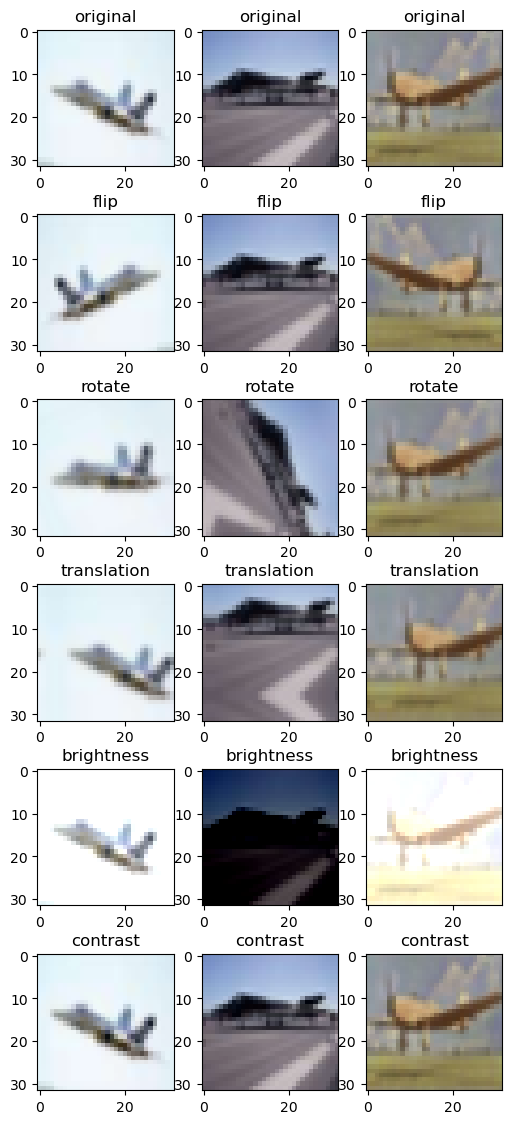

In [53]:
flip = tf.keras.layers.RandomFlip("horizontal", seed=seed_value)
rotate = tf.keras.layers.RandomRotation(0.2,seed=seed_value)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, seed=seed_value)
 
brightness = tf.keras.layers.RandomBrightness([-0.5,0.5], seed=seed_value)
contrast = tf.keras.layers.RandomContrast(0.15, seed=seed_value)

def flip_map(image, label):
    return flip(image), label

def rotate_map(image, label):
    return rotate(image), label

def translation_map(image, label):
    return translation(image), label

def brightness_map(image, label):
    return brightness(image), label

def contrast_map(image, label):
    return contrast(image), label

def augment(ds, map_func):
    augmented = ds.map(map_func)
    return augmented.prefetch(tf.data.experimental.AUTOTUNE)

fliped = augment(train_ds, flip_map)
rotated = augment(train_ds, rotate_map)
translation_aug = augment(train_ds, translation_map)
brightness_aug = augment(train_ds, brightness_map)
contrast_aug = augment(train_ds, contrast_map)

train_ds = train_ds.concatenate(fliped)
train_ds = train_ds.concatenate(rotated)
train_ds = train_ds.concatenate(translation_aug)
train_ds = train_ds.concatenate(brightness_aug)
train_ds = train_ds.concatenate(contrast_aug) 
 
fig, ax = plt.subplots(6, 3, figsize=(6,14))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # flip
        aug_batch = fliped.take(1)
        aug_i, aug_l = next(iter(aug_batch))
        ax[1][i].imshow(aug_i[i].numpy().astype("uint8"))
        ax[1][i].set_title("flip")
        # rotate
        aug_batch = rotated.take(1)
        aug_i, aug_l = next(iter(aug_batch))
        ax[2][i].imshow(aug_i[i].numpy().astype("uint8"))
        ax[2][i].set_title("rotate")
        # translation
        aug_batch = translation_aug.take(1)
        aug_i, aug_l = next(iter(aug_batch))
        ax[3][i].imshow(aug_i[i].numpy().astype("uint8"))
        ax[3][i].set_title("translation")
        # brightness
        aug_batch = brightness_aug.take(1)
        aug_i, aug_l = next(iter(aug_batch))
        ax[4][i].imshow(aug_i[i].numpy().astype("uint8"))
        ax[4][i].set_title("brightness")
        # contrast
        aug_batch = contrast_aug.take(1)
        aug_i, aug_l = next(iter(aug_batch))
        ax[5][i].imshow(aug_i[i].numpy().astype("uint8"))
        ax[5][i].set_title("contrast")
# plt.savefig('augmentation.png')
plt.show()


## Test 10: CNN6 with augmentation
CNN6 with learning rate 0.005, optimizer 'adamax' and augmentation. (5 times more training data).

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

Conv2D - (Batch normalization) Conv2D - (Batch normalization) MaxPooling2D - 

(Flatten) Dropout - Dense (1024) - Dropout - Dense (10)

In [51]:
name = 'cnn10'
n_epochs = 2
optimizer = 'adamax'
loss = 'sparse_categorical_crossentropy'
n_repeat = 2
filter = (3, 3)

keras.utils.set_random_seed(seed_value)

num_samples = train_ds.cardinality().numpy()
print(f'Number of samples: {num_samples*16}')

accuracy = []
for idx in range(n_repeat):
  print(f'Attempt #{idx + 1}')
  i = keras.Input(shape=input_shape)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(i)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(32, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(128, filter, activation='relu', padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D((2, 2))(x)

  x = keras.layers.Flatten()(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(n_classes, activation='softmax')(x)
  model = keras.Model(i, x)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=n_epochs
  )
  model.save(f'train_history/{name}/{idx}.keras')
  history_df = pd.DataFrame(history.history) 
  hist_csv_file = 'train_history/' + name + '/' + str(idx) + '_history.csv'
  with open(hist_csv_file, mode='w') as f:
      history_df.to_csv(f)
  plot_accuracy_and_loss(history_df, name, str(idx))
  curr_accuracy = plot_confusion_matrix(name, str(idx))
  accuracy.append(curr_accuracy)
  print(f'Attempt accuracy: {curr_accuracy * 100:.2f}%')

accuracy_df = pd.DataFrame(data=accuracy, columns = ['accuracy'])
accuracy_csv_file = 'train_history/' + name + '/accuracy.csv'
with open(accuracy_csv_file, mode='w') as f:
    accuracy_df.to_csv(f)
print(f'Attempts accuracy is saved to {accuracy_csv_file}')
plot_accuracy_boxplot(accuracy, name)

Number of samples: 432000
Attempt #1
Epoch 1/2
  253/27000 [..............................] - ETA: 28:23 - loss: 2.5779 - accuracy: 0.2638

KeyboardInterrupt: 